In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Results of poisoning attack

In [3]:
# Change this to point to the data directory
base_path = ""

In [4]:
readable = {
    "trigger_type": "Trigger",
    "trig": "Trigger",
    "full": "Full trigger",
    "red": "Reduced trigger",
    "gen": "Generated trigger",
    0: "",
    None: "No poison",
    "shap": "SHAP",
    "random": "Random",
    "entropy": "Entropy",
    "gini": "Gini",
    "fstrat": "Feature selection",
    "poison_asr_poison": "ASR",
    "GradientBoosting": "Gradient Boosting",
    "FFNN": "Feed-forward NN",
    "neris": "CTU-13 Neris",
    "botnet": "CIC IDS 2018 Botnet",
    "model": "Model",
}

def plot_poisoning_results_line(cur_df, no_eb=False, ds="neris"):
    trigger_types = sorted(cur_df["trigger_type"].unique())
    model_type = cur_df["model"].unique()
    assert len(model_type) == 1
    model_type = model_type[0]
    x_ticks = sorted(cur_df["Poison percentage (%)"].unique())

    # Setup seaborn to get the best results on a paper
    # sns.set(rc={"figure.dpi":300})
    sns.set(rc={"figure.dpi":96})
    sns.set_theme(style="whitegrid")
    # fig, ax = plt.subplots(len(trigger_types), 1, figsize=(9, len(trigger_types) * 5))

    if no_eb:
        eb = None
    else:
        eb = ("se")

    # for trig_type, ax in zip(trigger_types, ax):
    for trig_type in trigger_types:
        # Plot the ASR against the poison percentage
        lp = sns.lineplot(
            x="Poison percentage (%)",
            y="poison_asr_poison",
            hue="fstrat",
            data=cur_df[((cur_df["trigger_type"] == trig_type) & (cur_df["Poison percentage (%)"] != 10.0))],
            alpha=0.9,
            marker="o",
            errorbar=eb,
            linewidth=1.5,
            hue_order=["entropy", "gini", "shap", "random"],
            estimator="mean",
            palette="rocket_r"
        )

        lp.set_ylim(-0.02, 1.02)

        # Show the elements of the x axis
        lp.set_xticks(x_ticks)
        lp.set_ylabel(readable["poison_asr_poison"])

        # Format legend
        leg = lp.get_legend()
        leg.set_title(readable["fstrat"])
        texts_to_change = [readable[t.get_text()] for t in leg.texts]
        for t, l in zip(leg.texts, texts_to_change):
            t.set_text(l)
        # Move the legend below the plot at the center
        sns.move_legend(lp, "lower center", bbox_to_anchor=(0.5, -0.5), ncol=4, frameon=False)

        # Set title
        lp.set_title(
            f"{model_type} - {readable[ds]} - {readable[trig_type]}"
        )

        plt.tight_layout()
        plt.show()


def plot_poisoning_results_bar(cur_df, no_eb=False, ds="neris"):
    trigger_types = sorted(cur_df["trigger_type"].unique())
    model_type = cur_df["model"].unique()
    assert len(model_type) == 1
    model_type = model_type[0]

    # Setup seaborn to get the best results on a paper
    # sns.set(rc={"figure.dpi":300})
    sns.set(rc={"figure.dpi":96})
    sns.set_theme(style="whitegrid")

    # fig, ax = plt.subplots(len(trigger_types), 1, figsize=(9, len(trigger_types) * 5))

    if no_eb:
        eb = None
    else:
        eb = ("se")

    # for trig_type, ax in zip(trigger_types, ax):
    for trig_type in trigger_types:
        # Plot the ASR against the poison percentage
        lp = sns.barplot(
            x="Poison percentage (%)",
            y="poison_asr_poison",
            hue="fstrat",
            data=cur_df[((cur_df["trigger_type"] == trig_type) & (cur_df["Poison percentage (%)"] != 10.0))],
            alpha=0.9,
            errorbar=eb,
            hue_order=["entropy", "gini", "shap", "random"],
            estimator=np.mean,
            palette="rocket_r"
        )

        lp.set_ylim(-0.02, 1.02)
        lp.set_ylabel(readable["poison_asr_poison"])

        # Format legend
        leg = lp.get_legend()
        leg.set_title(readable["fstrat"])
        texts_to_change = [readable[t.get_text()] for t in leg.texts]
        for t, l in zip(leg.texts, texts_to_change):
            t.set_text(l)
        sns.move_legend(lp, "lower center", bbox_to_anchor=(0.5, -0.5), ncol=4, frameon=False)
            
        # Set title
        lp.set_title(
            f"{model_type} - {readable[ds]} - {readable[trig_type]}"
        )

        plt.tight_layout()
        plt.show()


def plot_strategy_comparison(compare_fstrat: pd.DataFrame, fstrat:str, readable: dict, trig_type:str, ds="neris", no_eb=True):
    if no_eb:
        eb = None
    else:
        eb = "se"
    sns.set(rc={"figure.dpi":300})
    sns.set_context("paper", font_scale=1.5)
    # sns.set(rc={"figure.dpi":96})
    sns.set_theme(style="whitegrid")
    
    x_ticks = sorted(compare_fstrat["Poison percentage (%)"].unique())

    lp = sns.barplot(
    # lp = sns.lineplot(
        x="Poison percentage (%)",
        y="poison_asr_poison",
        hue="model",
        data=compare_fstrat[compare_fstrat["Poison percentage (%)"] != 10.0],
        alpha=0.9,
        errorbar=eb,
        hue_order=["GradientBoosting", "FFNN"],
        estimator=np.mean,
        # palette="Set2",
        palette="rocket_r",
        # For lineplot
        # marker="o",
        # linewidth=1.5,
    )

    lp.set_ylim(-0.02, 1.02)
    lp.set_ylabel(readable["poison_asr_poison"])
    # lp.set_xticks(x_ticks)

    # Format legend
    leg = lp.get_legend()
    leg.set_title("Model type")
    texts_to_change = [readable[t.get_text()] for t in leg.texts]
    for t, l in zip(leg.texts, texts_to_change):
        t.set_text(l)
    sns.move_legend(lp, "lower center", bbox_to_anchor=(0.5, -0.5), ncol=4, frameon=False)
        
    # Set title
    # lp.set_title(
    #     f"{readable[fstrat]} strategy - {readable[ds]} - {readable[trig_type]}"
    # )

    plt.tight_layout()
    plt.show()


def plot_strategy_trigger_comparison(compare_fstrat: pd.DataFrame, fstrat:str, readable: dict, ds="neris", no_eb=True):
    if no_eb:
        eb = None
    else:
        eb = "se"
    # sns.set(rc={"figure.dpi":300})
    sns.set(rc={"figure.dpi":96})
    sns.set_theme(style="whitegrid")
    x_ticks = sorted(compare_fstrat["Poison percentage (%)"].unique())

    # lp = sns.barplot(
    lp = sns.lineplot(
        x="Poison percentage (%)",
        y="poison_asr_poison",
        hue="model",
        data=compare_fstrat[compare_fstrat["Poison percentage (%)"] != 10.0],
        alpha=0.9,
        errorbar=eb,
        hue_order=["GradientBoosting", "FFNN"],
        style="trigger_type",
        estimator=np.mean,
        # palette="Set2",
        palette="viridis",
        # For lineplot
        marker="o",
        linewidth=1.5,
    )

    lp.set_ylim(-0.02, 1.02)
    lp.set_ylabel(readable["poison_asr_poison"])
    # lp.set_xticks(x_ticks)

    # Format legend
    leg = lp.get_legend()
    # leg.set_title("Model type")
    texts_to_change = [readable[t.get_text()] for t in leg.texts]
    for t, l in zip(leg.texts, texts_to_change):
        t.set_text(l)
    # sns.move_legend(lp, "lower center", bbox_to_anchor=(0.5, -0.5), ncol=4, frameon=False)
    sns.move_legend(lp, "lower right")
        
    # Set title
    lp.set_title(
        f"{readable[fstrat]} strategy - {readable[ds]}"
    )
    plt.xscale("log")

    plt.tight_layout()
    plt.show()

In [5]:
def read_results(results_dir: str) -> pd.DataFrame:

    fstrats = os.listdir(results_dir)
    print("Found experiments: {}".format(fstrats))
    results = []

    for fstrat in fstrats:
        if fstrat == "entropy_nosave":
            continue

        for exp in os.listdir(os.path.join(results_dir, fstrat)):
            exp_dir = os.path.join(results_dir, fstrat, exp)

            try:
                with open(os.path.join(exp_dir, "args.json"), "r") as f:
                    args = json.load(f)

                with open(os.path.join(exp_dir, "results.json"), "r") as f:
                    res = json.load(f)

                # Add a column for the trigger type
                if args.get("reduce_trigger", False):
                    args["trigger_type"] = "red"
                elif args.get("generate_trigger", False):
                    args["trigger_type"] = "gen"
                else:
                    args["trigger_type"] = "full"

                to_append = {}
                to_append.update(args)
                to_append.update(res)
                results.append(to_append)

            except:
                print("Missing {}".format(exp_dir))
                pass

    results_df = pd.DataFrame.from_dict(results)

    # Define a new column called "Poison percentage (%)" which is p_frac * 100 (to make it easier to read)
    results_df["Poison percentage (%)"] = results_df["p_frac"] * 100

    # Remove rows with poison percentage >= 10%
    results_df = results_df[results_df["Poison percentage (%)"] < 10.0]

    # Define a new column "Trigger size (connections)" which is the number of connections in the trigger
    results_df["Trigger size (connections)"] = [i[0] for i in results_df["trig_shape_after"]]
    return results_df

# Load data

In [6]:
botnet_results_gb = read_results(f"{base_path}/cic-cic-ids-2018-botnet/supervised/poisoning/8/GradientBoosting")
botnet_results_fn = read_results(f"{base_path}/cic-cic-ids-2018-botnet/supervised/poisoning/8/FFNN")


Found experiments: ['shap', 'entropy']


Found experiments: ['entropy', 'shap']


In [8]:
all_full = pd.concat([
    botnet_results_gb[botnet_results_gb["trigger_type"] == "full"],
    botnet_results_fn[botnet_results_fn["trigger_type"] == "full"]
])
all_red = pd.concat([
    botnet_results_gb[botnet_results_gb["trigger_type"] == "red"],
    botnet_results_fn[botnet_results_fn["trigger_type"] == "red"]
])
all_gen = pd.concat([
    botnet_results_gb[botnet_results_gb["trigger_type"] == "gen"],
    botnet_results_fn[botnet_results_fn["trigger_type"] == "gen"]
])

In [9]:
cicids_all_res = pd.concat([all_full, all_red, all_gen])
cicids_all_res["subscenario"] = "botnet"
display(cicids_all_res)

,seed,scenario,target,model,fstrat,vstrat,n_features,window,test_number,reduce_trigger,...,clean_asr_subset,poison_acc_test,poison_f1_test,poison_acc_poison,poison_asr_poison,poison_acc_subset,poison_asr_subset,Poison percentage (%),Trigger size (connections),subscenario
0,0,cicids_botnet,0,GradientBoosting,shap,95th,8,30,200,False,...,0.0,0.999820,0.937833,0.000,1.000,0.915,0.085,0.1,613,botnet
3,0,cicids_botnet,0,GradientBoosting,shap,95th,8,30,200,False,...,0.0,0.999990,0.996633,0.000,1.000,0.995,0.005,0.5,613,botnet
6,0,cicids_botnet,0,GradientBoosting,shap,95th,8,30,200,False,...,0.0,0.999995,0.998319,0.000,1.000,1.000,0.000,1.0,613,botnet
9,0,cicids_botnet,0,GradientBoosting,shap,95th,8,30,200,False,...,0.0,0.999995,0.998319,0.000,1.000,1.000,0.000,2.0,613,botnet
12,0,cicids_botnet,0,GradientBoosting,shap,95th,8,30,200,False,...,0.0,0.999985,0.994958,0.000,1.000,0.995,0.005,5.0,613,botnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,4,cicids_botnet,0,FFNN,shap,95th,8,30,200,False,...,0.0,0.999985,0.994924,0.000,1.000,1.000,0.000,0.1,621,botnet
146,4,cicids_botnet,0,FFNN,shap,95th,8,30,200,False,...,0.0,0.999985,0.994924,0.155,0.845,1.000,0.000,0.5,621,botnet
147,4,cicids_botnet,0,FFNN,shap,95th,8,30,200,False,...,0.0,0.999985,0.994924,0.175,0.825,1.000,0.000,1.0,621,botnet
148,4,cicids_botnet,0,FFNN,shap,95th,8,30,200,False,...,0.0,0.999985,0.994924,0.175,0.825,1.000,0.000,2.0,621,botnet


In [11]:
iscx_results_gb_fv = read_results(f"{base_path}/ISCXVPN/NonVPN/file_video/supervised/poisoning/8/GradientBoosting")
iscx_results_gb_cv = read_results(f"{base_path}/ISCXVPN/NonVPN/chat_video/supervised/poisoning/8/GradientBoosting")
iscx_results_fn_fv = read_results(f"{base_path}/ISCXVPN/NonVPN/file_video/supervised/poisoning/8/FFNN")
iscx_results_fn_cv = read_results(f"{base_path}/ISCXVPN/NonVPN/chat_video/supervised/poisoning/8/FFNN")

Found experiments: ['shap', 'entropy']
Found experiments: ['entropy', 'shap']
Found experiments: ['shap', 'entropy']
Found experiments: ['entropy', 'shap']


In [12]:
iscx_all_res = pd.concat([iscx_results_fn_fv, iscx_results_gb_fv, iscx_results_fn_cv, iscx_results_gb_cv])
display(iscx_all_res)

,seed,scenario,subscenario,target,model,fstrat,vstrat,n_features,window,test_number,...,clean_acc_subset,clean_asr_subset,poison_acc_test,poison_f1_test,poison_acc_poison,poison_asr_poison,poison_acc_subset,poison_asr_subset,Poison percentage (%),Trigger size (connections)
0,0,iscx,file_video,0,FFNN,shap,95th,8,30,80,...,1.0,0.0,0.946781,0.723214,0.2375,0.7625,0.9125,0.0875,1.0,1
1,0,iscx,file_video,0,FFNN,shap,95th,8,30,80,...,1.0,0.0,0.956223,0.767123,0.0875,0.9125,0.9125,0.0875,2.0,98
2,0,iscx,file_video,0,FFNN,shap,95th,8,30,80,...,1.0,0.0,0.946781,0.735043,0.2750,0.7250,0.9750,0.0250,5.0,1
4,1,iscx,file_video,0,FFNN,shap,95th,8,30,80,...,1.0,0.0,0.943348,0.727273,0.2500,0.7500,0.9625,0.0375,1.0,1
5,1,iscx,file_video,0,FFNN,shap,95th,8,30,80,...,1.0,0.0,0.941631,0.716667,0.1875,0.8125,0.9500,0.0500,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2,iscx,chat_video,0,GradientBoosting,shap,95th,8,30,80,...,1.0,0.0,0.926036,0.882629,0.3375,0.6625,0.9625,0.0375,0.5,139
66,3,iscx,chat_video,0,GradientBoosting,shap,95th,8,30,80,...,1.0,0.0,0.946746,0.918919,0.9750,0.0250,1.0000,0.0000,0.1,94
67,3,iscx,chat_video,0,GradientBoosting,shap,95th,8,30,80,...,1.0,0.0,0.940828,0.909091,0.2375,0.7625,0.9875,0.0125,0.5,94
68,4,iscx,chat_video,0,GradientBoosting,shap,95th,8,30,80,...,1.0,0.0,0.937870,0.902326,1.0000,0.0000,1.0000,0.0000,0.1,139


In [13]:
assert set(cicids_all_res.columns) == set(iscx_all_res.columns)

In [14]:
both_res = pd.concat([cicids_all_res, iscx_all_res])
display(both_res)

,seed,scenario,target,model,fstrat,vstrat,n_features,window,test_number,reduce_trigger,...,clean_asr_subset,poison_acc_test,poison_f1_test,poison_acc_poison,poison_asr_poison,poison_acc_subset,poison_asr_subset,Poison percentage (%),Trigger size (connections),subscenario
0,0,cicids_botnet,0,GradientBoosting,shap,95th,8,30,200,False,...,0.0,0.999820,0.937833,0.0000,1.0000,0.9150,0.0850,0.1,613,botnet
3,0,cicids_botnet,0,GradientBoosting,shap,95th,8,30,200,False,...,0.0,0.999990,0.996633,0.0000,1.0000,0.9950,0.0050,0.5,613,botnet
6,0,cicids_botnet,0,GradientBoosting,shap,95th,8,30,200,False,...,0.0,0.999995,0.998319,0.0000,1.0000,1.0000,0.0000,1.0,613,botnet
9,0,cicids_botnet,0,GradientBoosting,shap,95th,8,30,200,False,...,0.0,0.999995,0.998319,0.0000,1.0000,1.0000,0.0000,2.0,613,botnet
12,0,cicids_botnet,0,GradientBoosting,shap,95th,8,30,200,False,...,0.0,0.999985,0.994958,0.0000,1.0000,0.9950,0.0050,5.0,613,botnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2,iscx,0,GradientBoosting,shap,95th,8,30,80,False,...,0.0,0.926036,0.882629,0.3375,0.6625,0.9625,0.0375,0.5,139,chat_video
66,3,iscx,0,GradientBoosting,shap,95th,8,30,80,False,...,0.0,0.946746,0.918919,0.9750,0.0250,1.0000,0.0000,0.1,94,chat_video
67,3,iscx,0,GradientBoosting,shap,95th,8,30,80,False,...,0.0,0.940828,0.909091,0.2375,0.7625,0.9875,0.0125,0.5,94,chat_video
68,4,iscx,0,GradientBoosting,shap,95th,8,30,80,False,...,0.0,0.937870,0.902326,1.0000,0.0000,1.0000,0.0000,0.1,139,chat_video


## Comparison with other datasets

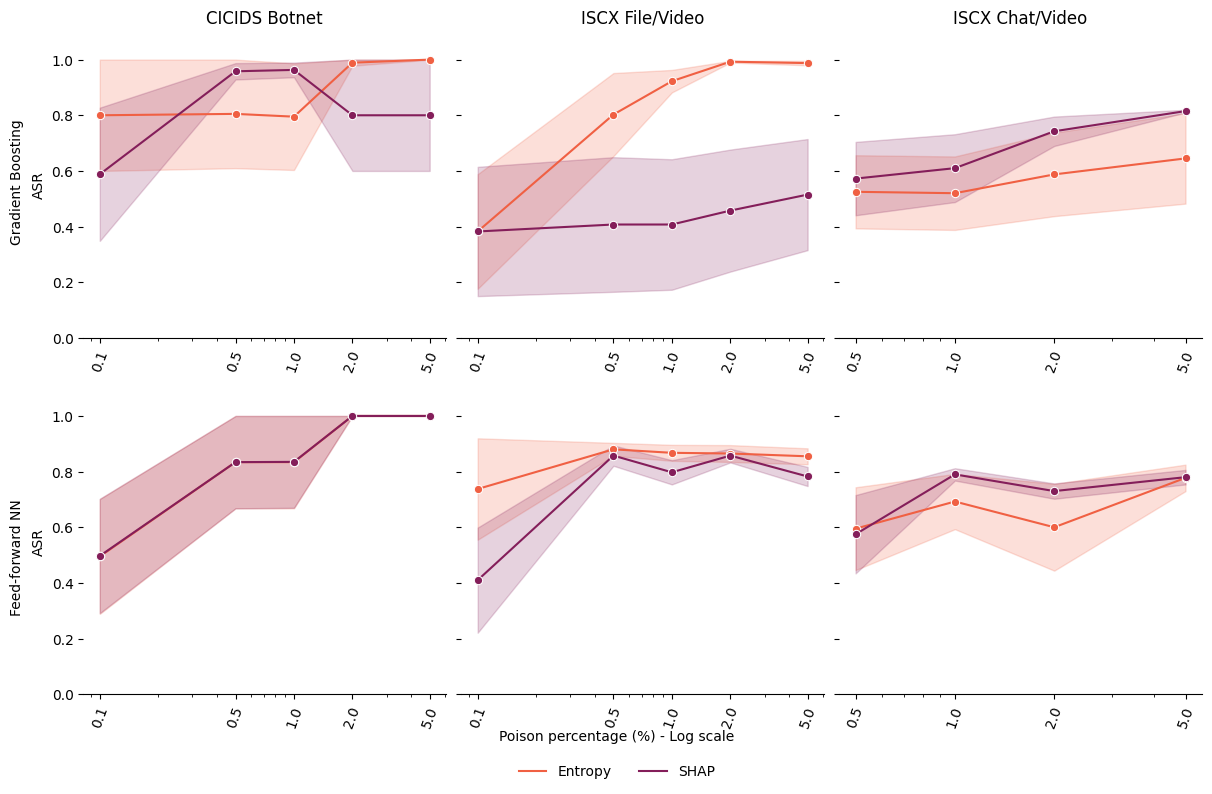

In [15]:
# Make two side by side barplot
fig, axes = plt.subplots(2, 3, figsize=(12, 7.5), sharey=True)

# fig = plt.figure(figsize=(11, 5))
hue_order = ["entropy", "shap"]
style_order = ["GradientBoosting", "FFNN"]
# sns.set(font_scale=1.5, rc={"figure.dpi":300}, style="whitegrid")

d_bp_c = both_res[(both_res["trigger_type"] == "full") & (both_res["subscenario"] == "botnet")]
d_bp_i1 = both_res[(both_res["trigger_type"] == "full") & (both_res["subscenario"] == "file_video")]
d_bp_i2 = both_res[(both_res["trigger_type"] == "full") & (both_res["subscenario"] == "chat_video") & (both_res["Poison percentage (%)"] > 0.1)]
data_s = [d_bp_c, d_bp_i1, d_bp_i2]

palette = "rocket_r"
# palette = "winter"
# palette = "viridis"

bp_c0 = sns.lineplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_c[d_bp_c["model"] == "GradientBoosting"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    marker="o",
    ax=axes[0][0]
)
bp_i01 = sns.lineplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_i1[d_bp_i1["model"] == "GradientBoosting"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    marker="o",
    ax=axes[0][1]
)   
bp_i02 = sns.lineplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_i2[d_bp_i2["model"] == "GradientBoosting"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    marker="o",
    ax=axes[0][2]
)

bp_c1 = sns.lineplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_c[d_bp_c["model"] == "FFNN"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    marker="o",
    ax=axes[1][0]
)
bp_i11 = sns.lineplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_i1[d_bp_i1["model"] == "FFNN"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    marker="o",
    ax=axes[1][1]
)   
bp_i12 = sns.lineplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_i2[d_bp_i2["model"] == "FFNN"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    marker="o",
    ax=axes[1][2]
)

for i in range(2):
    for j in range(3):
        ax = axes[i][j]
        data = data_s[j]

        ax.set_xscale('log')
        unique_values = np.unique(data['Poison percentage (%)'])
        ax.set_xticks(unique_values)
        ax.set_xticklabels(unique_values)
        plt.setp(ax.get_xticklabels(), rotation=70) 
        ax.set_xlabel('')

axes[0][0].set_title('CICIDS Botnet')
axes[0][0].set_ylabel('ASR')
axes[1][0].set_ylabel('ASR')

axes[0][1].set_title('ISCX File/Video')
axes[0][2].set_title('ISCX Chat/Video')


sns.despine(left=True, right=True)

# Set ylim for all plots
for ax in fig.axes:
    ax.set_ylim(0, 1.1)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]

lines_labels = lines_labels[-1:]
for bp in [bp_c0, bp_i01, bp_i02, bp_c1, bp_i11, bp_i12]:
    bp.get_legend().remove()
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
labels = [readable[l] for l in labels]

# set a common x axis label
fig.text(0.5, 0.01, 'Poison percentage (%) - Log scale', ha='center', va='center')

# Set legend title
leg = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=2, frameon=False, title=None)

fig.text(.0, 0.75, f'{readable["GradientBoosting"]}', ha='center', va='center', rotation='vertical')
fig.text(.0, 0.25, f'{readable["FFNN"]}', ha='center', va='center', rotation='vertical')


plt.tight_layout()
plt.show()

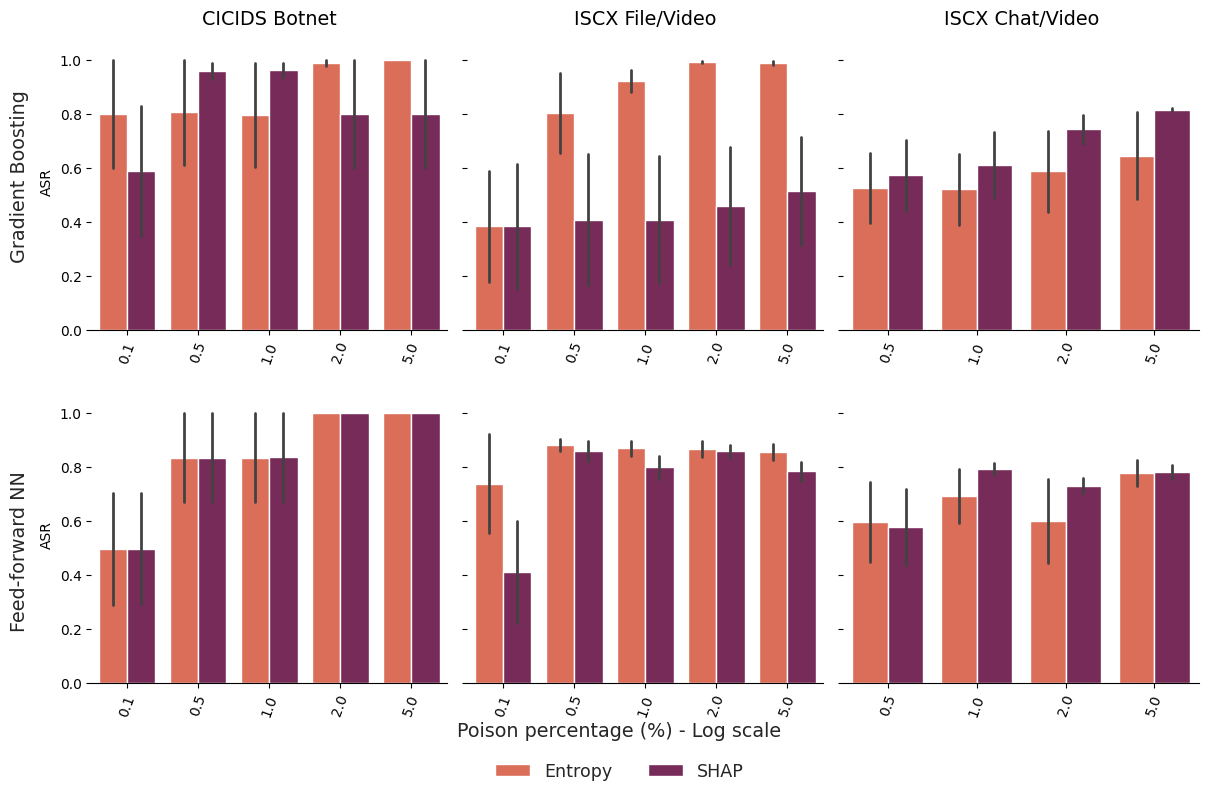

In [16]:
# Make two side by side barplot
fig, axes = plt.subplots(2, 3, figsize=(12, 7.5), sharey=True)

# fig = plt.figure(figsize=(11, 5))
hue_order = ["entropy", "shap"]
style_order = ["GradientBoosting", "FFNN"]
sns.set(font_scale=1.15, rc={"figure.dpi":300}, style="whitegrid")

d_bp_c = both_res[(both_res["trigger_type"] == "full") & (both_res["subscenario"] == "botnet")]
d_bp_i1 = both_res[(both_res["trigger_type"] == "full") & (both_res["subscenario"] == "file_video") & (both_res["Poison percentage (%)"] < 15)]
d_bp_i2 = both_res[(both_res["trigger_type"] == "full") & (both_res["subscenario"] == "chat_video") & (both_res["Poison percentage (%)"] > 0.1) & (both_res["Poison percentage (%)"] < 15)]
data_s = [d_bp_c, d_bp_i1, d_bp_i2]

palette = "rocket_r"
# palette = "winter"
# palette = "viridis"

bp_c0 = sns.barplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_c[d_bp_c["model"] == "GradientBoosting"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    errwidth=2.0,
    ax=axes[0][0]
)
bp_i01 = sns.barplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_i1[d_bp_i1["model"] == "GradientBoosting"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    errwidth=2.0,
    ax=axes[0][1]
)   
bp_i02 = sns.barplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_i2[d_bp_i2["model"] == "GradientBoosting"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    errwidth=2.0,
    ax=axes[0][2]
)

bp_c1 = sns.barplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_c[d_bp_c["model"] == "FFNN"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    errwidth=2.0,
    ax=axes[1][0]
)
bp_i11 = sns.barplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_i1[d_bp_i1["model"] == "FFNN"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    errwidth=2.0,
    ax=axes[1][1]
)   
bp_i12 = sns.barplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_i2[d_bp_i2["model"] == "FFNN"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    errwidth=2.0,
    ax=axes[1][2]
)

for i in range(2):
    for j in range(3):
        ax = axes[i][j]
        data = data_s[j]

        plt.setp(ax.get_xticklabels(), rotation=70) 
        ax.set_xlabel('')
        ax.set_ylabel('')

axes[0][0].set_title('CICIDS Botnet')
axes[0][0].set_ylabel('ASR')
axes[1][0].set_ylabel('ASR')

axes[0][1].set_title('ISCX File/Video')
axes[0][2].set_title('ISCX Chat/Video')


sns.despine(left=True, right=True)

# Set ylim for all plots
for ax in fig.axes:
    ax.set_ylim(0, 1.1)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]

lines_labels = lines_labels[-1:]
for bp in [bp_c0, bp_i01, bp_i02, bp_c1, bp_i11, bp_i12]:
    bp.get_legend().remove()
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
labels = [readable[l] for l in labels]

# set a common x axis label
fig.text(0.5, 0.01, 'Poison percentage (%) - Log scale', ha='center', va='center')

# Set legend title
leg = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=2, frameon=False, title=None)

fig.text(.0, 0.75, f'{readable["GradientBoosting"]}', ha='center', va='center', rotation='vertical')
fig.text(.0, 0.25, f'{readable["FFNN"]}', ha='center', va='center', rotation='vertical')


plt.tight_layout()
plt.show()

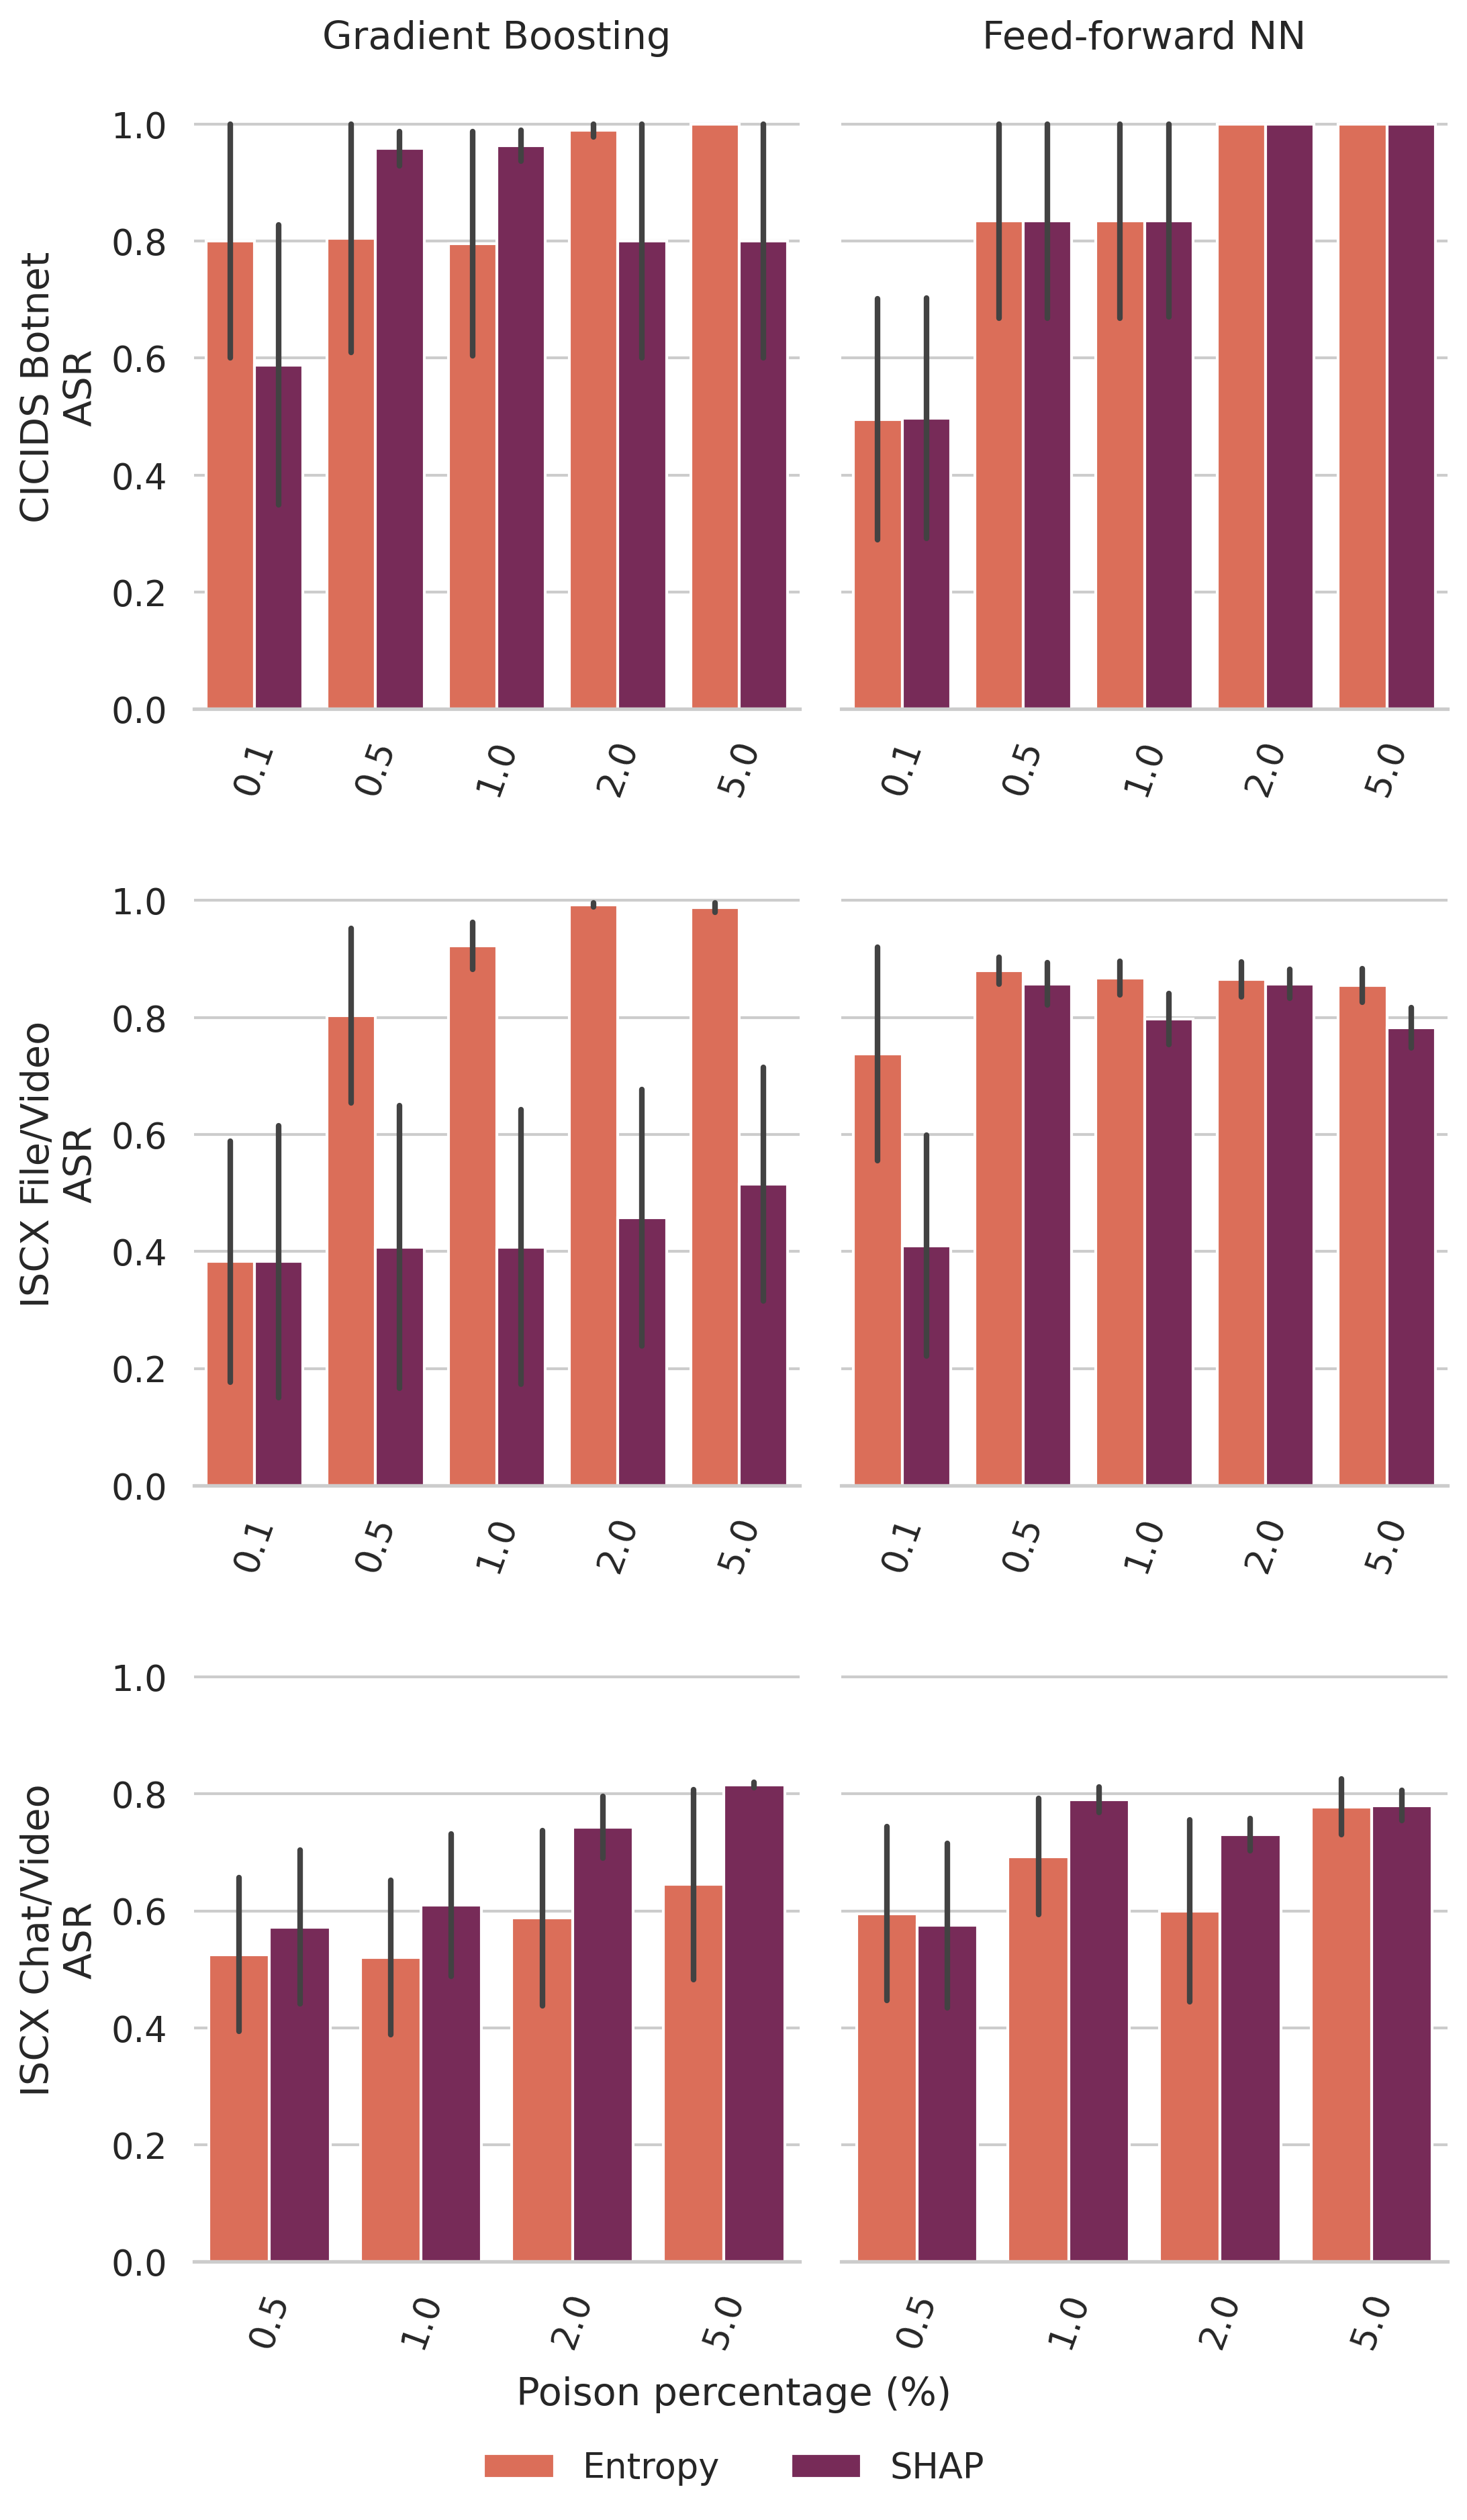

In [17]:
# Make two side by side barplot
fig, axes = plt.subplots(3, 2, figsize=(7.5, 12), sharey=True)

# fig = plt.figure(figsize=(11, 5))
hue_order = ["entropy", "shap"]
style_order = ["GradientBoosting", "FFNN"]
sns.set(font_scale=1.15, rc={"figure.dpi":300}, style="whitegrid")

d_bp_c = both_res[(both_res["trigger_type"] == "full") & (both_res["subscenario"] == "botnet")]
d_bp_i1 = both_res[(both_res["trigger_type"] == "full") & (both_res["subscenario"] == "file_video") & (both_res["Poison percentage (%)"] < 15)]
d_bp_i2 = both_res[(both_res["trigger_type"] == "full") & (both_res["subscenario"] == "chat_video") & (both_res["Poison percentage (%)"] > 0.1) & (both_res["Poison percentage (%)"] < 15)]
data_s = [d_bp_c, d_bp_i1, d_bp_i2]

palette = "rocket_r"
# palette = "winter"
# palette = "viridis"

bp_c0 = sns.barplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_c[d_bp_c["model"] == "GradientBoosting"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    errwidth=2.0,
    ax=axes[0][0]
)
bp_i01 = sns.barplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_i1[d_bp_i1["model"] == "GradientBoosting"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    errwidth=2.0,
    ax=axes[1][0]
)   
bp_i02 = sns.barplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_i2[d_bp_i2["model"] == "GradientBoosting"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    errwidth=2.0,
    ax=axes[2][0]
)

bp_c1 = sns.barplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_c[d_bp_c["model"] == "FFNN"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    errwidth=2.0,
    ax=axes[0][1]
)
bp_i11 = sns.barplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_i1[d_bp_i1["model"] == "FFNN"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    errwidth=2.0,
    ax=axes[1][1]
)   
bp_i12 = sns.barplot(
    x="Poison percentage (%)",
    y="poison_asr_poison",
    hue="fstrat",
    data=d_bp_i2[d_bp_i2["model"] == "FFNN"],
    hue_order=hue_order,
    palette=palette,
    errorbar=("se"),
    errwidth=2.0,
    ax=axes[2][1]
)

for i in range(3):
    for j in range(2):
        ax = axes[i][j]
        data = data_s[j]

        plt.setp(ax.get_xticklabels(), rotation=70) 
        ax.set_xlabel('')
        ax.set_ylabel('')

axes[0][0].set_ylabel('CICIDS Botnet\nASR')
axes[1][0].set_ylabel('ISCX File/Video\nASR')
axes[2][0].set_ylabel('ISCX Chat/Video\nASR')

axes[0][0].set_title(f'{readable["GradientBoosting"]}')
axes[0][1].set_title(f'{readable["FFNN"]}')


sns.despine(left=True, right=True)

# Set ylim for all plots
for ax in fig.axes:
    ax.set_ylim(0, 1.1)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]

lines_labels = lines_labels[-1:]
for bp in [bp_c0, bp_i01, bp_i02, bp_c1, bp_i11, bp_i12]:
    bp.get_legend().remove()
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
labels = [readable[l] for l in labels]

# set a common x axis label
fig.text(0.5, 0.0, 'Poison percentage (%)', ha='center', va='center')

# Set legend title
leg = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=2, frameon=False, title=None)

# fig.text(.0, 0.75, f'{readable["GradientBoosting"]}', ha='center', va='center', rotation='vertical')
# fig.text(.0, 0.25, f'{readable["FFNN"]}', ha='center', va='center', rotation='vertical')


plt.tight_layout()
plt.show()

In [18]:
# compute the average and std of the "poison_f1_test" col for each group of "scenario", "subscenario", "model", "fstrat", "Poison percentage (%)", "trigger_type"
both_grps = both_res.groupby(by=["scenario", "subscenario", "model", "fstrat", "Poison percentage (%)", "trigger_type"]).agg({"poison_f1_test": ["mean", "std"]})

In [19]:
# for i, g in both_grps:
#     print(g.shape)
#     display(g)
#     break

In [20]:
# filter out the rows where trigger_type != "full"
both_grps = both_grps[both_grps.index.get_level_values("trigger_type") == "full"].copy()

In [21]:
both_grps.head(30)

poison_f1_test  \
                                                                                                mean   
scenario      subscenario model            fstrat  Poison percentage (%) trigger_type                  
cicids_botnet botnet      FFNN             entropy 0.1                   full               0.978882   
                                                   0.5                   full               0.977293   
                                                   1.0                   full               0.994264   
                                                   2.0                   full               0.977628   
                                                   5.0                   full               0.994930   
                                           shap    0.1                   full               0.994258   
                                                   0.5                   full               0.977964   
                                                   1.0                   full               0.948170   
                                                   2.0                   full               0.977286   
                                                   5.0                   full               0.994930   
                          GradientBoosting entropy 0.1                   full               0.990826   
                                                   0.5                   full               0.992646   
                                                   1.0                   full               0.988176   
                                                   2.0                   full               0.992547   
                                                   5.0                   full               0.993921   
                                           shap    0.1                   full               0.980818   
                                                   0.5                   full               0.981148   
                                                   1.0                   full               0.984928   
                                                   2.0                   full               0.983628   
                                                   5.0                   full               0.980232   
iscx          chat_video  FFNN             entropy 0.1                   full               0.926556   
                                                   0.5                   full               0.912501   
                                                   1.0                   full               0.915287   
                                                   2.0                   full               0.911432   
                                                   5.0                   full               0.903213   
                                           shap    0.1                   full               0.926556   
                                                   0.5                   full               0.904462   
                                                   1.0                   full               0.904642   
                                                   2.0                   full               0.903314   
                                                   5.0                   full               0.900818   

                                                                                                 
                                                                                            std  
scenario      subscenario model            fstrat  Poison percentage (%) trigger_type            
cicids_botnet botnet      FFNN             entropy 0.1                   full          0.034109  
                                                   0.5                   full          0.037671  
                                                   1.0                   full          0.003676  
                                                   2.0           

In [22]:
ref_f1s = {
    "cicids_botnet": {
        "botnet": {"GradientBoosting": 0.9936391135214663, "FFNN": 0.9949295626960601}
    },
    "iscx": {
        "chat_video": {
            "GradientBoosting": 0.9006942331155736,
            "FFNN": 0.9187867946007481,
        },
        "file_video": {
            "GradientBoosting": 0.8003810852662347,
            "FFNN": 0.718457563347224,
        },
    },
}


In [23]:
f1_deltas = []
for row in both_grps.iterrows():
    cur_scenario = row[0][0]
    cur_subscenario = row[0][1]
    cur_model = row[0][2]
    new_f1 = row[1][("poison_f1_test", "mean")]
    old_f1 = ref_f1s[cur_scenario][cur_subscenario][cur_model]
    delta = new_f1 - old_f1
    f1_deltas.append(delta)

both_grps["f1_delta"] = f1_deltas

In [24]:
both_grps["f1_delta"].groupby(by=["scenario", "subscenario", "model", "fstrat", "trigger_type", ]).agg(["mean", "std"])
# both_grps["f1_delta"].groupby(by=["scenario", "subscenario", "fstrat", "trigger_type", ]).agg(["mean", "std"])
# both_grps["f1_delta"].groupby(by=["scenario", "subscenario", "model", "Poison percentage (%)", "trigger_type", ]).agg(["mean", "std"])


mean  \
scenario      subscenario model            fstrat  trigger_type             
cicids_botnet botnet      FFNN             entropy full         -0.010330   
                                           shap    full         -0.016408   
                          GradientBoosting entropy full         -0.002016   
                                           shap    full         -0.011489   
iscx          chat_video  FFNN             entropy full         -0.004989   
                                           shap    full         -0.010828   
                          GradientBoosting entropy full         -0.007851   
                                           shap    full         -0.010270   
              file_video  FFNN             entropy full         -0.001494   
                                           shap    full          0.010524   
                          GradientBoosting entropy full         -0.008326   
                                           shap    full          0.004250   

                                                                      std  
scenario      subscenario model            fstrat  trigger_type            
cicids_botnet botnet      FFNN             entropy full          0.009149  
                                           shap    full          0.018973  
                          GradientBoosting entropy full          0.002219  
                                           shap    full          0.002022  
iscx          chat_video  FFNN             entropy full          0.008431  
                                           shap    full          0.010508  
                          GradientBoosting entropy full          0.007210  
                                           shap    full          0.006315  
              file_video  FFNN             entropy full          0.008241  
                                           shap    full          0.003704  
                          GradientBoosting entropy full          0.009255  
                                           shap    full          0.002609

In [25]:
both_grps["f1_delta"].groupby(by=["scenario", "subscenario", "model", "fstrat", "trigger_type", "Poison percentage (%)"]).agg(["mean", "std", "min", "max", "count"])

mean  \
scenario      subscenario model            fstrat  trigger_type Poison percentage (%)                 
cicids_botnet botnet      FFNN             entropy full         0.1                   -1.604706e-02   
                                                                0.5                   -1.763639e-02   
                                                                1.0                   -6.654573e-04   
                                                                2.0                   -1.730141e-02   
                                                                5.0                    9.620283e-09   
                                           shap    full         0.1                   -6.711122e-04   
                                                                0.5                   -1.696528e-02   
                                                                1.0                   -4.675975e-02   
                                                                2.0                   -1.764324e-02   
                                                                5.0                    9.620283e-09   
                          GradientBoosting entropy full         0.1                   -2.813435e-03   
                                                                0.5                   -9.929905e-04   
                                                                1.0                   -5.462965e-03   
                                                                2.0                   -1.092358e-03   
                                                                5.0                    2.820343e-04   
                                           shap    full         0.1                   -1.282146e-02   
                                                                0.5                   -1.249116e-02   
                                                                1.0                   -8.711463e-03   
                                                                2.0                   -1.001089e-02   
                                                                5.0                   -1.340754e-02   
iscx          chat_video  FFNN             entropy full         0.1                    7.769096e-03   
                                                                0.5                   -6.285872e-03   
                                                                1.0                   -3.499800e-03   
                                                                2.0                   -7.354491e-03   
                                                                5.0                   -1.557426e-02   
                                           shap    full         0.1                    7.769096e-03   
                                                                0.5                   -1.432452e-02   
                                                                1.0                   -1.414448e-02   
                                                                2.0                   -1.547321e-02   
                                                                5.0                   -1.796929e-02   
                          GradientBoosting entropy full         0.1                    2.220446e-16   
                                                                0.5                   -9.340388e-03   
                                                                1.0                   -2.441100e-03   
                                                                2.0                   -8.964603e-03   
                                                                5.0                   -1.850935e-02   
                                           shap    full         0.1                    2.220446e-16   
                                                                0.5                   -1.083302e-02   
                                                                1.0           

In [26]:
both_grps["f1_delta"].min()

-0.04675974798058635

In [27]:
both_grps["f1_delta"].max()

0.015490679461720558